In [79]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [80]:
digits=load_digits()

In [81]:
digits.data.shape

(1797, 64)

In [82]:
type(digits.data)

numpy.ndarray

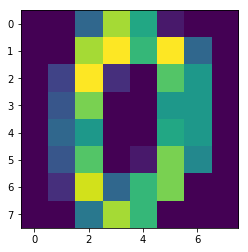

In [83]:
plt.imshow(digits.data[0].reshape(8,8))

In [84]:
digit_center=digits.data-digits.data.mean(axis=0)/digits.data.max()

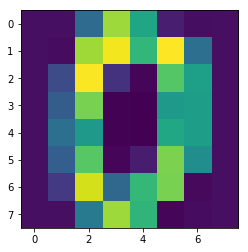

In [85]:
plt.imshow(digit_center[0].reshape(8,8))

In [86]:
U,s,V=np.linalg.svd(digit_center)

In [87]:
eigen_vec=V.T

In [88]:
eigen_vec.shape

(64, 64)

In [89]:
eigen_vec_reduce=V.T[:,0:10]

In [90]:
digit_center.shape

(1797, 64)

In [91]:
eigen_vec_reduce.shape

(64, 10)

In [92]:
digit_reduce=np.dot(digit_center,eigen_vec_reduce)

In [93]:
digit_reduce.shape

(1797, 10)

In [94]:
digit_reconstruct=np.dot(digit_reduce,eigen_vec_reduce.T)

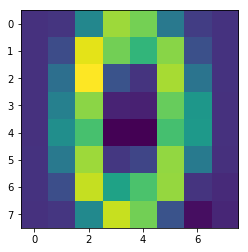

In [95]:
plt.imshow(digit_reconstruct[0].reshape(8,8))

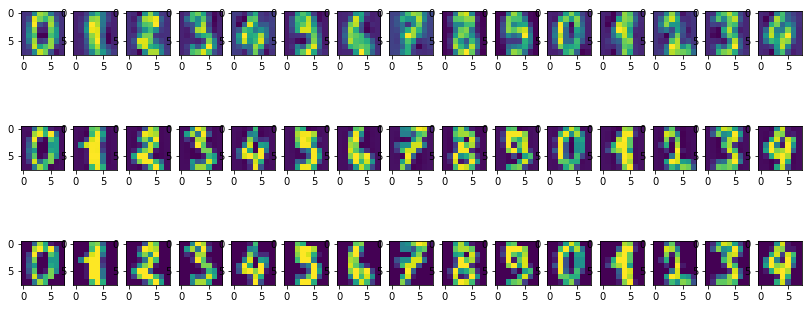

In [96]:
#projectd (reduced dimesion reconstruct), centered normalized image, original image
fig,ax=plt.subplots(3,15,figsize=(14,6))
for i in range(15):  #,ax in enumerate(axes.flat):
    ax[0,i].imshow(digit_reconstruct[i].reshape(8,8))
    ax[1,i].imshow(digit_center[i].reshape(8,8))
    ax[2,i].imshow(digits.data[i].reshape(8,8))
plt.show()    

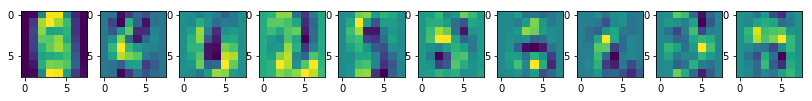

In [97]:
#eigen numbers/ weight vectors
W=eigen_vec_reduce.T
Wp=W.reshape(W.shape[0],8,8)
fig,axes=plt.subplots(1,10,figsize=(14,6))
for i,ax in enumerate(axes.flat):   #in range(10):
    #ax.imshow(Wp[i].reshape(8,8))
    ax.imshow(W[i].reshape(8,8))

plt.show()    

In [69]:
W.shape

(10, 64)

In [70]:
Wp=W.reshape(W.shape[0],8,8)

In [72]:
Wp.shape

(10, 8, 8)

In [74]:
Wp[0]

array([[1.69386165e-18, 5.75313624e-03, 1.00619334e-01, 2.29555833e-01,
        2.29507097e-01, 1.10943389e-01, 2.52301038e-02, 2.23879152e-03],
       [1.16072193e-04, 3.85491341e-02, 2.01707795e-01, 2.32822370e-01,
        2.00938835e-01, 1.59490080e-01, 3.47158542e-02, 1.84020172e-03],
       [5.05107874e-05, 5.03697741e-02, 1.93178755e-01, 1.37215925e-01,
        1.39436237e-01, 1.52277281e-01, 3.35217555e-02, 8.80930786e-04],
       [2.05903126e-05, 4.73085539e-02, 1.76099621e-01, 1.73245621e-01,
        1.94170727e-01, 1.45528651e-01, 4.32459768e-02, 4.17855502e-05],
       [0.00000000e+00, 4.46176005e-02, 1.48596697e-01, 1.77973973e-01,
        2.00787638e-01, 1.68060862e-01, 5.53979940e-02, 0.00000000e+00],
       [1.66720525e-04, 3.02402879e-02, 1.35015821e-01, 1.41082585e-01,
        1.48951078e-01, 1.60907978e-01, 6.63680406e-02, 5.53856874e-04],
       [1.37122001e-04, 1.36844822e-02, 1.47148469e-01, 1.86308368e-01,
        1.84203963e-01, 1.71611858e-01, 7.16060510e-02, 3.

In [116]:
from sklearn.datasets import fetch_lfw_people

faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
names=faces.target_names
unique, counts = np.unique(faces.target, return_counts=True)
print(list(zip(unique, counts)))
print(list(zip(names[unique], counts)))

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
[(0, 77), (1, 236), (2, 121), (3, 530), (4, 109), (5, 71), (6, 60), (7, 144)]
[('Ariel Sharon', 77), ('Colin Powell', 236), ('Donald Rumsfeld', 121), ('George W Bush', 530), ('Gerhard Schroeder', 109), ('Hugo Chavez', 71), ('Junichiro Koizumi', 60), ('Tony Blair', 144)]


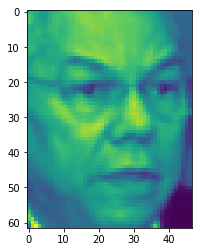

In [118]:
plt.imshow(faces.images[0].reshape(62,47))

In [170]:
#with 150 eigen vector
images_=faces.images.reshape(1348,2914)
U,s,V=np.linalg.svd(images_)
eigen_vec=V.T
eigen_vec_reduce=V.T[:,0:150]
face_reduce=np.dot(images_,eigen_vec_reduce)
face_reconstruct=np.dot(face_reduce,eigen_vec_reduce.T)

[ 474 1204  935  748  845  626  108  188  746 1145]
(1348, 2914)


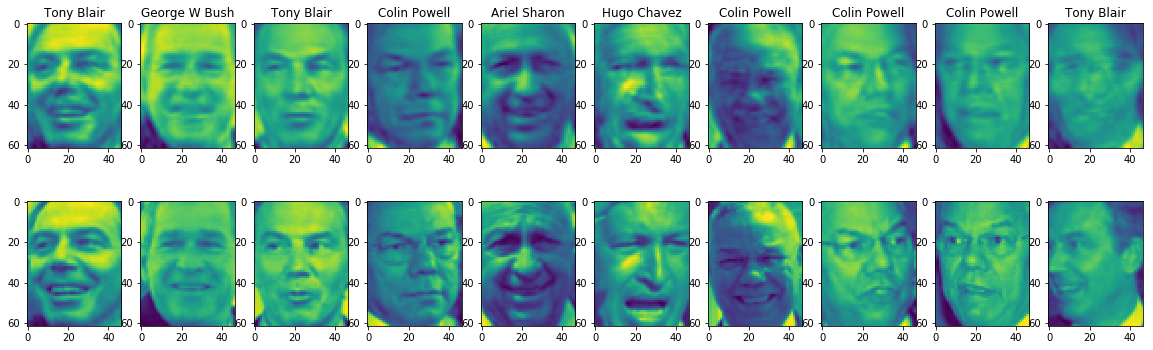

In [171]:
fig,ax=plt.subplots(2,10,figsize=(20,6))
idx=np.random.choice(np.arange(0,1348,1),10)
print(idx)
print(face_reconstruct.shape)
for j,i in enumerate(idx):  #,ax in enumerate(axes.flat):
    
    ax[0,j].imshow(face_reconstruct[i].reshape(62,47),label=names[faces.target[i]])
    ax[0,j].set_title(names[faces.target[i]])
    ax[1,j].imshow(images_[i].reshape(62,47))
    
plt.show()    

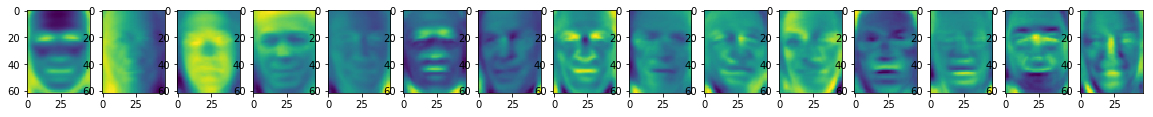

In [158]:
W=eigen_vec_reduce.T
#Wp=W.reshape(W.shape[0],8,8)
fig,axes=plt.subplots(1,15,figsize=(20,6))
for i,ax in enumerate(axes.flat):   #in range(10):
    #ax.imshow(Wp[i].reshape(8,8))
    ax.imshow(W[i].reshape(62,47))

plt.show()   